In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02



In [3]:
reg = 'Car'
line = 'CarC'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

17.88722171455478

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
dlog=-0.15

In [8]:
table = sosflog(data,dlog)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                              \
       count      mean       std       min       25%       50%       75%   
ils                                                                        
0    79632.0  8.822079  1.411036  7.079512  7.734754  8.492168  9.564552   
1    86831.0  5.978455  0.591909  5.011954  5.461078  5.950229  6.473471   
2    77214.0  4.271865  0.421765  3.548183  3.906396  4.267581  4.635338   
3    52129.0  3.043270  0.295874  2.511887  2.790511  3.049301  3.296650   
4    30960.0  2.154455  0.211257  1.778300  1.973531  2.153584  2.338684   
5    18001.0  1.530209  0.150499  1.258994  1.401459  1.536238  1.662842   
6     9492.0  1.082344  0.105465  0.891412  0.993006  1.086119  1.173982   
7     5078.0  0.767613  0.073971  0.630986  0.707276  0.770630  0.833140   
8     2709.0  0.545503  0.052532  0.446690  0.500807  0.547953  0.591773   
9     1428.0  0.383780  0.039517  0.316555  0.348172  0.385730  0.418820   
10     735.0  0.273898  0.027120  0.223978  0.251760  0.276707  0.298185   
11     314.0  0.191810  0.020269  0.158874  0.171456  0.191680  0.211666   
12     152.0  0.137136  0.013903  0.112960  0.124210  0.139348  0.148269   
13      82.0  0.096325  0.010509  0.080596  0.084982  0.098314  0.105083   
14      37.0  0.070683  0.006943  0.056542  0.066775  0.072971  0.075354   
15      16.0  0.047470  0.003233  0.042258  0.046470  0.048143  0.048227   
16       4.0  0.036452  0.003104  0.033659  0.033849  0.036283  0.038887   
17       6.0  0.024623  0.002828  0.021383  0.022233  0.024784  0.026972   
22       1.0  0.003864       NaN  0.003864  0.003864  0.003864  0.003864   
24       1.0  0.002450       NaN  0.002450  0.002450  0.002450  0.002450   

                    dV2                                                \
           max    count       mean        std           min       25%   
ils                                                                     
0    17.667695  79632.0  32.408286  45.749592  2.381196e-08  3.589071   
1     7.079349  86831.0  36.903934  53.513901  8.889477e-09  3.514445   
2     5.011859  77214.0  39.131157  53.610725  2.584115e-10  3.997598   
3     3.548012  52129.0  37.905501  52.734635  3.801128e-11  3.693447   
4     2.511863  30960.0  37.595148  51.580798  3.265670e-08  3.777636   
5     1.778212  18001.0  34.535599  50.509231  9.909324e-10  3.209986   
6     1.258847   9492.0  29.502056  46.421319  2.975437e-08  2.369223   
7     0.891203   5078.0  25.009619  43.141571  4.507002e-08  1.863550   
8     0.630448   2709.0  19.015260  37.647610  2.558189e-07  1.250215   
9     0.446639   1428.0  12.989111  27.764297  1.764624e-06  0.932836   
10    0.315879    735.0  13.763670  24.294312  5.390344e-07  0.997170   
11    0.223817    314.0   8.052478  13.738207  2.850950e-05  0.471864   
12    0.158369    152.0   7.306101  12.212270  2.930135e-05  0.528824   
13    0.111860     82.0   5.394123   9.443920  2.581224e-04  0.595121   
14    0.079394     37.0   4.615157  12.699277  7.871523e-03  0.149162   
15    0.053792     16.0   5.444448  12.427506  1.894508e-03  0.203877   
16    0.039583      4.0   0.883847   0.704272  2.581004e-01  0.375429   
17    0.027701      6.0   0.464242   0.592936  4.085501e-03  0.092643   
22    0.003864      1.0   0.343263        NaN  3.432635e-01  0.343263   
24    0.002450      1.0   0.340384        NaN  3.403837e-01  0.340384   

                                       
           50%        75%         max  
ils                                    
0    15.270469  42.048701  618.739704  
1    15.929574  47.510881  545.217642  
2    17.861704  52.956727  561.022357  
3    17.285545  50.768432  639.505649  
4    17.779742  50.895451  476.959145  
5    15.312667  43.489025  489.073666  
6    11.591944  34.783562  538.206996  
7     8.881298  28.860753  408.254603  
8     6.115145  20.433598  656.613128  
9     4.737579  13.830395  419.528815  
10    4.626144  13.277443  156.818147  
11    2.883515   9.346

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

0.48086519033245134

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.06472688882613517

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

3.886641733099236

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
m = 1.1

In [16]:
rgrid = np.logspace(-2, 1)

(17.88722171455478, 0.48086519033245134, 1.1)

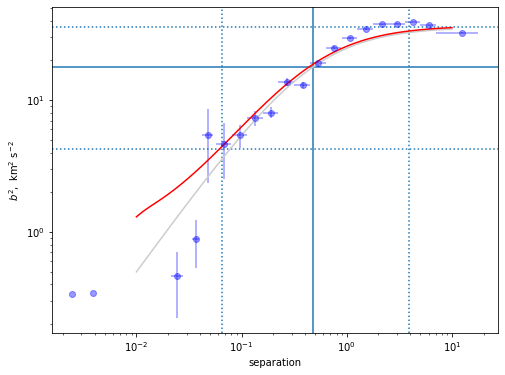

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], b2.mean()*0.05), color="red")

ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [18]:
table

s                                                              \
       count      mean       std       min       25%       50%       75%   
ils                                                                        
0    79632.0  8.822079  1.411036  7.079512  7.734754  8.492168  9.564552   
1    86831.0  5.978455  0.591909  5.011954  5.461078  5.950229  6.473471   
2    77214.0  4.271865  0.421765  3.548183  3.906396  4.267581  4.635338   
3    52129.0  3.043270  0.295874  2.511887  2.790511  3.049301  3.296650   
4    30960.0  2.154455  0.211257  1.778300  1.973531  2.153584  2.338684   
5    18001.0  1.530209  0.150499  1.258994  1.401459  1.536238  1.662842   
6     9492.0  1.082344  0.105465  0.891412  0.993006  1.086119  1.173982   
7     5078.0  0.767613  0.073971  0.630986  0.707276  0.770630  0.833140   
8     2709.0  0.545503  0.052532  0.446690  0.500807  0.547953  0.591773   
9     1428.0  0.383780  0.039517  0.316555  0.348172  0.385730  0.418820   
10     735.0  0.273898  0.027120  0.223978  0.251760  0.276707  0.298185   
11     314.0  0.191810  0.020269  0.158874  0.171456  0.191680  0.211666   
12     152.0  0.137136  0.013903  0.112960  0.124210  0.139348  0.148269   
13      82.0  0.096325  0.010509  0.080596  0.084982  0.098314  0.105083   
14      37.0  0.070683  0.006943  0.056542  0.066775  0.072971  0.075354   
15      16.0  0.047470  0.003233  0.042258  0.046470  0.048143  0.048227   
16       4.0  0.036452  0.003104  0.033659  0.033849  0.036283  0.038887   
17       6.0  0.024623  0.002828  0.021383  0.022233  0.024784  0.026972   
22       1.0  0.003864       NaN  0.003864  0.003864  0.003864  0.003864   
24       1.0  0.002450       NaN  0.002450  0.002450  0.002450  0.002450   

                    dV2                                                \
           max    count       mean        std           min       25%   
ils                                                                     
0    17.667695  79632.0  32.408286  45.749592  2.381196e-08  3.589071   
1     7.079349  86831.0  36.903934  53.513901  8.889477e-09  3.514445   
2     5.011859  77214.0  39.131157  53.610725  2.584115e-10  3.997598   
3     3.548012  52129.0  37.905501  52.734635  3.801128e-11  3.693447   
4     2.511863  30960.0  37.595148  51.580798  3.265670e-08  3.777636   
5     1.778212  18001.0  34.535599  50.509231  9.909324e-10  3.209986   
6     1.258847   9492.0  29.502056  46.421319  2.975437e-08  2.369223   
7     0.891203   5078.0  25.009619  43.141571  4.507002e-08  1.863550   
8     0.630448   2709.0  19.015260  37.647610  2.558189e-07  1.250215   
9     0.446639   1428.0  12.989111  27.764297  1.764624e-06  0.932836   
10    0.315879    735.0  13.763670  24.294312  5.390344e-07  0.997170   
11    0.223817    314.0   8.052478  13.738207  2.850950e-05  0.471864   
12    0.158369    152.0   7.306101  12.212270  2.930135e-05  0.528824   
13    0.111860     82.0   5.394123   9.443920  2.581224e-04  0.595121   
14    0.079394     37.0   4.615157  12.699277  7.871523e-03  0.149162   
15    0.053792     16.0   5.444448  12.427506  1.894508e-03  0.203877   
16    0.039583      4.0   0.883847   0.704272  2.581004e-01  0.375429   
17    0.027701      6.0   0.464242   0.592936  4.085501e-03  0.092643   
22    0.003864      1.0   0.343263        NaN  3.432635e-01  0.343263   
24    0.002450      1.0   0.340384        NaN  3.403837e-01  0.340384   

                                       
           50%        75%         max  
ils                                    
0    15.270469  42.048701  618.739704  
1    15.929574  47.510881  545.217642  
2    17.861704  52.956727  561.022357  
3    17.285545  50.768432  639.505649  
4    17.779742  50.895451  476.959145  
5    15.312667  43.489025  489.073666  
6    11.591944  34.783562  538.206996  
7     8.881298  28.860753  408.254603  
8     6.115145  20.433598  656.613128  
9     4.737579  13.830395  419.528815  
10    4.626144  13.277443  156.818147  
11    2.883515   9.346

In [19]:
Car = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [20]:
f = open('SFresults\\'+ line + '.pkl',"wb")
pickle.dump(Car,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.886798858642578 seconds ---
